# Implementation of **PID** for Non-Linear Binary Control Systems

PID will be applied in the context of: inverted pendulum and DC-DC buck-boost converters.

## Setup

### Importing Modules

In [18]:
import numpy as np
import matlab.engine
import matplotlib.pyplot as plt

### Defining Global Variables

In [19]:
time = 0
integral = 0
time_prev = -1e-6
error_prev = 0

## PID Control

Here the controller output signal `u` is defined in terms of the gain coefficients `K`, as well as the `desired` and `measured` signals.

In [20]:
def u(Kp, Ki, Kd, desired, measured):
    global time, integral, time_prev, error_prev
    
    # Error
    error = desired - measured

    # Gain Coefficients
    P = Kp * error
    integral = integral + Ki * error * (time - time_prev)
    D = Kd * (error - error_prev)/(time - time_prev)

    # Controller Output Signal
    u = P + integral + D

    # Update for Next Iteration
    error_prev = error
    time_prev = time

    return u

## Inverted Pendulum

### Linear System
The angle `θ` (in radians) of the pendulum is given as a function of time `t` and other system parameters.

In [35]:
def theta(A, L, t,  g=9.81):
    angle = A * np.cos(np.sqrt(g/L)*t)
    return angle

## DC-DC Buck-Boost Converter

## Main
Here PID will be applied to the Simulink models for the inverted pendulum and DC-DC buck-boost converter systems.

Text(0, 0.5, 'Angle')

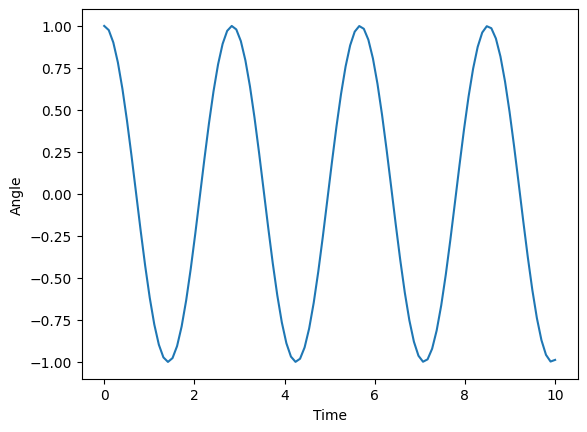

In [36]:
time = np.linspace(0.0,10.0,100)
plt.plot(time,theta(1,2, time))
plt.xlabel("Time")
plt.ylabel("Amplitude")